# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

**Expected Accuracy Score: >89%**

**Submission:** share your notebook to instructors, and prepare your presentation on the next Monday morning. 

**Make sure you upload your notebook here:** https://drive.google.com/drive/folders/1y4LzAvd1101kJ6kO5UkF--58Nw412eTw?usp=sharing

**Make sure to upload the pickle file of your pipeline to the google drive folder here so we can test everyone's pipeline with our hidden test set:**  https://drive.google.com/drive/folders/17d7nooRwE8NVIh2Vzz3jjcwSGQ0Iiol2?usp=sharing

**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Confusion Matrix
- Plot the images that the model predicts incorrectly
- Use confusion matrix and images plotted incorrectly to do error analysis

## Sample code to get fashion MNIST data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [37]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Sample code to display images

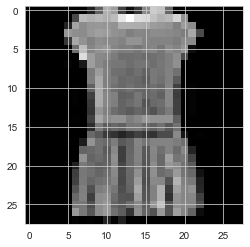

In [38]:
plt.imshow(X_train[3], cmap='gray')

In [39]:
def plot_images(images, labels):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [40]:
def get_samples(n_samples, X, y):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(y)), n_samples, replace=False)
  return X[samples_index], y[samples_index]

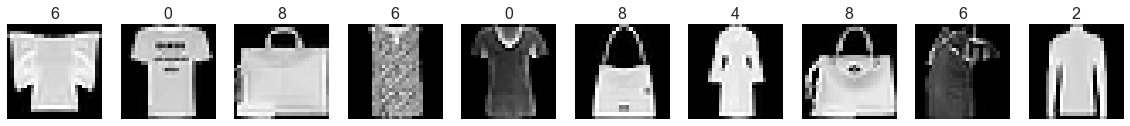

In [41]:
images, labels = get_samples(10, X_train, y_train)
plot_images(images, labels)

## Your Code 

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

## **Plotting distribution**

<AxesSubplot:ylabel='count'>

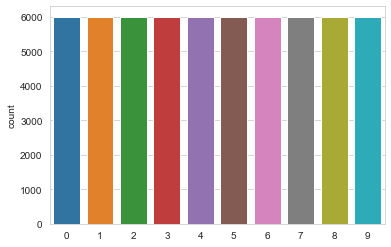

In [7]:
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

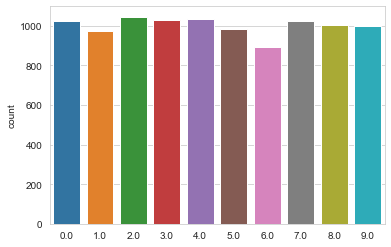

In [33]:
sns.countplot(y_test)

## **Transform data for training**


In [66]:
# n_samples = 2000
# n_test_samples = 400
# # Your code here
# X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
# X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

# # Normalization
# X_train_flat = X_train_flat.reshape((n_samples, -1))/255
# X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_flat = X_train.reshape((-1, 784))/255
X_train_std = sc.fit_transform(X_train_flat) # Maybe bad idea?
X_train_std[1]

array([-0.00864371, -0.02322333, -0.03917806, -0.04132172, -0.05764575,
        0.10043738, -0.09887845, -0.15665258, -0.23908034, -0.37782705,
        0.1392615 ,  2.1474988 ,  0.7416029 ,  0.04606764, -0.03740188,
       -0.15683454,  0.52153313,  2.0264642 ,  2.0640078 ,  0.17186363,
       -0.20335123, -0.14022098, -0.10981155, -0.09222425, -0.06827667,
       -0.05051678, -0.0332743 , -0.01362235, -0.01257211, -0.0178614 ,
       -0.03304932,  0.09771095, -0.07809374, -0.13108967, -0.24379931,
        0.6530119 ,  1.5830815 ,  2.0193987 ,  1.4263232 ,  1.2800208 ,
        1.1863587 ,  1.399198  ,  1.4265845 ,  1.353589  ,  1.4228287 ,
        1.2979614 ,  1.558499  ,  2.7510352 ,  3.4552336 ,  3.3963387 ,
        1.2998682 , -0.14894699, -0.11854527, -0.09005845, -0.05847776,
       -0.02894636, -0.01552501, -0.02550164, -0.04603359, -0.07369479,
       -0.12885574,  0.1279926 ,  2.6786962 ,  2.6927507 ,  2.2121534 ,
        1.6200788 ,  1.1553589 ,  1.023166  ,  0.9462057 ,  0.95

In [21]:
X_test_flat = X_test.reshape((-1, 784))/255
# todo: standardscaler on this later

In [24]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_std, y_train, test_size=0.1)

## **XGBoost**

In [25]:
import xgboost as xgb

In [26]:
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50
    
d_train = xgb.DMatrix(X_train_s, label=y_train_s)
d_val = xgb.DMatrix(X_test_s, label=y_test_s)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.17676	validation-merror:0.19367
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.16250	validation-merror:0.17583
[2]	train-merror:0.15441	validation-merror:0.16700
[3]	train-merror:0.14876	validation-merror:0.16383
[4]	train-merror:0.14635	validation-merror:0.16467
[5]	train-merror:0.14576	validation-merror:0.16300
[6]	train-merror:0.14409	validation-merror:0.16083
[7]	train-merror:0.14222	validation-merror:0.15750
[8]	train-merror:0.14026	validation-merror:0.15683
[9]	train-merror:0.13874	validation-merror:0.15667
[10]	train-merror:0.13772	validation-merror:0.15433
[11]	train-merror:0.13672	validation-merror:0.15367
[12]	train-merror:0.13607	validation-merror:0.15250
[13]	train-merror:0.13517	validation-merror:0.15117
[14]	train-merror:0.13446	validation-merror:0.15083
[15]	train-merror:0.13307	validation-merror:0.15083
[16]	train-merror:0

[154]	train-merror:0.04867	validation-merror:0.09900
[155]	train-merror:0.04820	validation-merror:0.09917
[156]	train-merror:0.04798	validation-merror:0.09883
[157]	train-merror:0.04763	validation-merror:0.09867
[158]	train-merror:0.04728	validation-merror:0.09900
[159]	train-merror:0.04691	validation-merror:0.09900
[160]	train-merror:0.04657	validation-merror:0.09917
[161]	train-merror:0.04632	validation-merror:0.09883
[162]	train-merror:0.04604	validation-merror:0.09867
[163]	train-merror:0.04576	validation-merror:0.09883
[164]	train-merror:0.04539	validation-merror:0.09883
[165]	train-merror:0.04498	validation-merror:0.09850
[166]	train-merror:0.04448	validation-merror:0.09867
[167]	train-merror:0.04424	validation-merror:0.09833
[168]	train-merror:0.04389	validation-merror:0.09850
[169]	train-merror:0.04365	validation-merror:0.09867
[170]	train-merror:0.04335	validation-merror:0.09933
[171]	train-merror:0.04320	validation-merror:0.09900
[172]	train-merror:0.04281	validation-merror:0

[309]	train-merror:0.01589	validation-merror:0.09217
[310]	train-merror:0.01589	validation-merror:0.09217
[311]	train-merror:0.01576	validation-merror:0.09200
[312]	train-merror:0.01557	validation-merror:0.09250
[313]	train-merror:0.01548	validation-merror:0.09217
[314]	train-merror:0.01535	validation-merror:0.09217
[315]	train-merror:0.01533	validation-merror:0.09217
[316]	train-merror:0.01522	validation-merror:0.09250
[317]	train-merror:0.01509	validation-merror:0.09250
[318]	train-merror:0.01493	validation-merror:0.09217
[319]	train-merror:0.01489	validation-merror:0.09217
[320]	train-merror:0.01476	validation-merror:0.09217
[321]	train-merror:0.01467	validation-merror:0.09183
[322]	train-merror:0.01448	validation-merror:0.09217
[323]	train-merror:0.01448	validation-merror:0.09217
[324]	train-merror:0.01437	validation-merror:0.09200
[325]	train-merror:0.01437	validation-merror:0.09233
[326]	train-merror:0.01428	validation-merror:0.09250
[327]	train-merror:0.01420	validation-merror:0

[464]	train-merror:0.00554	validation-merror:0.09000
[465]	train-merror:0.00552	validation-merror:0.08983
[466]	train-merror:0.00550	validation-merror:0.08967
[467]	train-merror:0.00544	validation-merror:0.08983
[468]	train-merror:0.00539	validation-merror:0.08983
[469]	train-merror:0.00530	validation-merror:0.08967
[470]	train-merror:0.00524	validation-merror:0.09033
[471]	train-merror:0.00522	validation-merror:0.09017
[472]	train-merror:0.00522	validation-merror:0.09000
[473]	train-merror:0.00520	validation-merror:0.09017
[474]	train-merror:0.00513	validation-merror:0.09017
[475]	train-merror:0.00507	validation-merror:0.09017
[476]	train-merror:0.00502	validation-merror:0.09000
[477]	train-merror:0.00500	validation-merror:0.09017
[478]	train-merror:0.00500	validation-merror:0.08983
[479]	train-merror:0.00498	validation-merror:0.08983
[480]	train-merror:0.00498	validation-merror:0.08967
[481]	train-merror:0.00493	validation-merror:0.09017
[482]	train-merror:0.00493	validation-merror:0

In [34]:
X_test_std = sc.fit_transform(X_test_flat)

In [51]:
d_test = xgb.DMatrix(data=X_test_std)
y_pred = bst.predict(d_test)

In [52]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8986


# Logistic Regression

In [78]:
log_reg = LogisticRegression(penalty='l2', random_state=100, solver='lbfgs', max_iter=200)

In [79]:
log_reg.fit(X_train_flat, y_train)

LogisticRegression(max_iter=200, random_state=100)

In [80]:
# Predict on training set
train_predict = log_reg.predict(X_train_flat)
print('Accuracy:', accuracy_score(y_train, train_predict))

Accuracy: 0.8737


In [81]:
# Predict on test set
test_predict = log_reg.predict(X_test_flat)
print('Accuracy:', accuracy_score(y_test, test_predict))

Accuracy: 0.8433


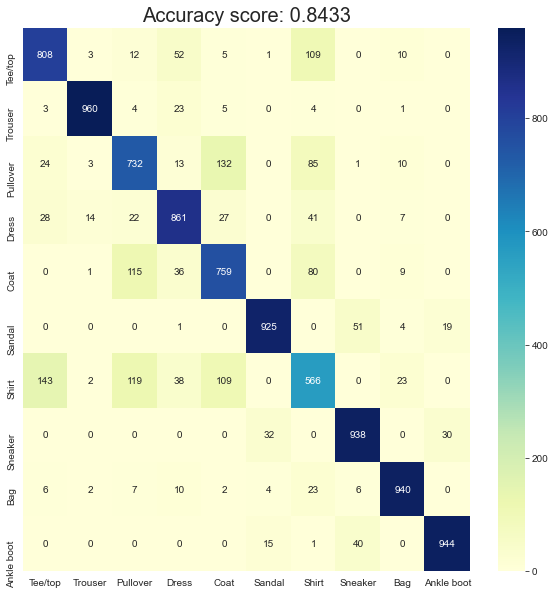

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, test_predict), cmap="YlGnBu", annot=True, fmt="d",
           xticklabels=['Tee/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
           yticklabels=['Tee/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.title(f'Accuracy score: {accuracy_score(y_test, test_predict)}', fontsize=20)
plt.show()

[7 4 9 ... 4 6 8]


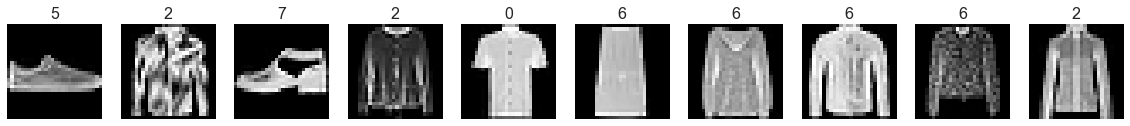

In [91]:
wrong_predicted_images = X_test_flat[y_test != test_predict].reshape((-1, 28, 28))
wrong_predictions = test_predict[y_test != test_predict]
right_label = y_test[y_test != test_predict]
plot_images(wrong_predicted_images[:10], wrong_predictions[:10])


In [99]:
import pickle

pickle.dump(log_reg, open('log_reg_1_84.pkl', 'wb'))

In [100]:
with open('log_reg_1_84.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test, predictions)}')

Accuracy score: 0.8433


## **Using SVM**

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [105]:
parameters = [{'kernel': ['poly', 'rbf'],
              'C':[1, 10, 100]}]

model = SVC()

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 scoring='accuracy',
                                 n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['poly', 'rbf']}],
             scoring='accuracy')

In [106]:
pd.DataFrame(gridsearch_models.cv_results_)[['mean_fit_time', 'param_C', 'param_kernel', 'mean_test_score', 'rank_test_score']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,696.531290,9.870114,257.830219,5.290639,1,poly,"{'C': 1, 'kernel': 'poly'}",0.867500,0.861750,0.867333,0.868583,0.863417,0.865717,0.002647,6
1,553.584813,3.313340,275.731685,1.453134,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.892500,0.884333,0.891333,0.893250,0.886167,0.889517,0.003584,3
2,532.410898,2.580705,217.495412,2.312704,10,poly,"{'C': 10, 'kernel': 'poly'}",0.885833,0.879167,0.883833,0.887917,0.882167,0.883783,0.003007,4
3,501.107433,2.014306,250.795298,0.999541,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.904417,0.899833,0.904917,0.906250,0.900667,0.903217,0.002509,1
4,447.391971,4.937919,197.607087,2.912249,100,poly,"{'C': 100, 'kernel': 'poly'}",0.881833,0.880583,0.884417,0.884500,0.879083,0.882083,0.002126,5
5,451.140922,68.233400,225.669495,38.786490,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.895750,0.893833,0.897833,0.901083,0.896000,0.896900,0.002446,2


In [114]:
pd.DataFrame(gridsearch_models.cv_results_)[['mean_fit_time', 'param_C', 'param_kernel', 'mean_test_score', 'rank_test_score']]

,mean_fit_time,param_C,param_kernel,mean_test_score,rank_test_score
0,696.531290,1,poly,0.865717,6
1,553.584813,1,rbf,0.889517,3
2,532.410898,10,poly,0.883783,4
3,501.107433,10,rbf,0.903217,1
4,447.391971,100,poly,0.882083,5
5,451.140922,100,rbf,0.896900,2


In [107]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'kernel': 'rbf'}
Best score 0.9032166666666667


In [109]:
best_svc = gridsearch_models.best_estimator_

In [110]:
# Predict on test set
test_predict = best_svc.predict(X_test_flat)
print('Accuracy:', accuracy_score(y_test, test_predict))

Accuracy: 0.9002


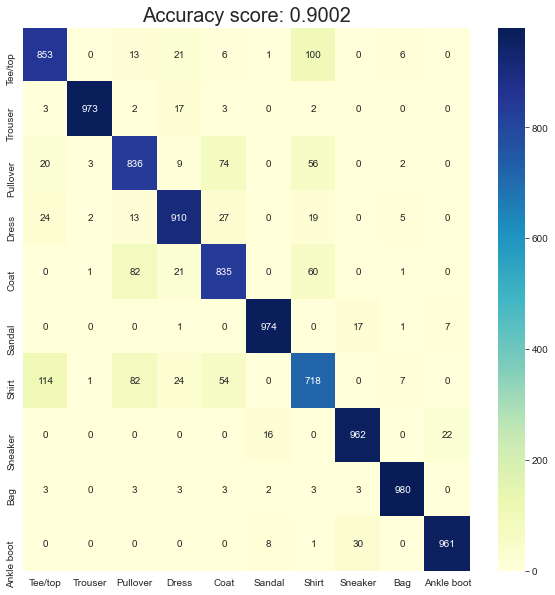

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, test_predict), cmap="YlGnBu", annot=True, fmt="d",
           xticklabels=['Tee/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
           yticklabels=['Tee/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.title(f'Accuracy score: {accuracy_score(y_test, test_predict)}', fontsize=20)
plt.show()

In [112]:
import pickle

pickle.dump(best_svc, open('svc_c10_rbf_902_bestscore.pkl', 'wb'))

In [113]:
gridsearch_models.best_estimator_

SVC(C=10)

## **Random Forest**

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [132]:
forest_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100)
forest_clf.fit(X_train_flat, y_train)

RandomForestClassifier(max_depth=100)

In [133]:
# Predict on training set
forest_train_predict = forest_clf.predict(X_train_flat)
print('Accuracy:', accuracy_score(y_train, forest_train_predict))

Accuracy: 1.0


In [134]:
# Predict on test set
forest_test_predict = forest_clf.predict(X_test_flat)
print('Accuracy:', accuracy_score(y_test, forest_test_predict))

Accuracy: 0.8775


In [ ]:
#### Grid search for n_estimators [50, 100], max_depth [50, 100], criterion ['gini', 'entropy']

In [137]:
params_rfclf = [{'n_estimators': [50, 100],
              'max_depth':[50, 100],
              'criterion':['gini', 'entropy']}]

model_rfclf = RandomForestClassifier()

gridsearch_rf_clf = GridSearchCV(estimator=model_rfclf,
                                 param_grid=params_rfclf,
                                 scoring='accuracy',
                                 n_jobs=-1)

gridsearch_rf_clf.fit(X_train_flat, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [50, 100], 'n_estimators': [50, 100]}],
             scoring='accuracy')

In [141]:
rf_clf_result = pd.DataFrame(gridsearch_rf_clf.cv_results_)

In [144]:
rf_clf_result.drop(columns=['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score
0,104.316422,6.239474,1.282537,0.397100,gini,50,50,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.878250,0.003576,8
1,241.279979,17.097855,3.323224,1.309207,gini,50,100,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.882683,0.002630,3
2,102.235732,7.842088,0.711323,0.046017,gini,100,50,"{'criterion': 'gini', 'max_depth': 100, 'n_est...",0.879717,0.004226,6
3,180.931951,2.781037,1.436465,0.085210,gini,100,100,"{'criterion': 'gini', 'max_depth': 100, 'n_est...",0.883133,0.001820,1
4,97.474902,2.512994,0.747269,0.239250,entropy,50,50,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",0.879450,0.002433,7
5,218.970198,6.385009,1.710821,0.236004,entropy,50,100,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",0.882517,0.003140,4
6,97.225343,4.286441,0.742034,0.041613,entropy,100,50,"{'criterion': 'entropy', 'max_depth': 100, 'n_...",0.879750,0.003128,5
7,162.485727,27.918291,1.047944,0.211579,entropy,100,100,"{'criterion': 'entropy', 'max_depth': 100, 'n_...",0.883067,0.003090,2


In [143]:
rf_clf_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,104.316422,6.239474,1.282537,0.397100,gini,50,50,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.876583,0.872250,0.882083,0.881417,0.878917,0.878250,0.003576,8
1,241.279979,17.097855,3.323224,1.309207,gini,50,100,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.884250,0.877750,0.885250,0.883750,0.882417,0.882683,0.002630,3
2,102.235732,7.842088,0.711323,0.046017,gini,100,50,"{'criterion': 'gini', 'max_depth': 100, 'n_est...",0.879583,0.873000,0.883750,0.884583,0.877667,0.879717,0.004226,6
3,180.931951,2.781037,1.436465,0.085210,gini,100,100,"{'criterion': 'gini', 'max_depth': 100, 'n_est...",0.883917,0.879833,0.885333,0.883583,0.883000,0.883133,0.001820,1
4,97.474902,2.512994,0.747269,0.239250,entropy,50,50,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",0.881500,0.875750,0.881083,0.881583,0.877333,0.879450,0.002433,7
5,218.970198,6.385009,1.710821,0.236004,entropy,50,100,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",0.881667,0.877167,0.884833,0.886333,0.882583,0.882517,0.003140,4
6,97.225343,4.286441,0.742034,0.041613,entropy,100,50,"{'criterion': 'entropy', 'max_depth': 100, 'n_...",0.881250,0.874750,0.880667,0.884000,0.878083,0.879750,0.003128,5
7,162.485727,27.918291,1.047944,0.211579,entropy,100,100,"{'criterion': 'entropy', 'max_depth': 100, 'n_...",0.881000,0.879250,0.887167,0.886250,0.881667,0.883067,0.003090,2


## XGBoost